## Assignment 3
Haider, Shabih, 21027325

In [179]:
import numpy as np
import pandas as pd
import wbgapi as wb
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import scipy.optimize as opt


In [194]:
# This function retrieves data from world bank website and saves it into a file
def get_world_bank_data(c_codes):
    # Indicator ids
    indicator_ids = ['EG.USE.PCAP.KG.OE', 'EN.ATM.METH.KT.CE', 'EN.ATM.GHGT.KT.CE']
    print(wb.series.info(indicator_ids))
    
    years = np.array(range(1990, 2014))

    #MultiIndex Columns
    columns=pd.MultiIndex.from_arrays([['Energy use','Total greenhouse gas emissions',
                                              'Methane emissions'],
                                                ['','','']])
    #MultiIndex Rows
    idx = pd.MultiIndex.from_product([c_codes, years],
                                       names=['Country', 'Year'])

    wb_dataframe = pd.DataFrame()

    for c_code in c_codes:
        wb_df = wb.data.DataFrame(indicator_ids, c_code, time=range(1990,2014)).set_index(columns)
        #use concat hierarchical indexing
        wb_dataframe = pd.concat([wb_dataframe, wb_df.T], ignore_index=True)

    wb_dataframe = wb_dataframe.set_index(idx)

    # Checking for null values in dataframe
    display("Checking null values in DataFrame")
    display(wb_dataframe.isnull().sum())
    
    return wb_dataframe

In [193]:
# Selected countries
country_codes = ['CHN', 'FRA', 'DEU', 'IND', 'USA', 'WLD']
country_names = {
    "CHN" : "China",
    "FRA" : "France",
    "DEU" : "Germany",
    "IND" : "India",
    "USA" : "United States",
    "WLD" : "World"
}

# This following function is used to fetch the data from WB API. Only call this function if you want to update the data.
climate_dataset = get_world_bank_data(country_codes)
climate_dataset

id                 value
-----------------  -----------------------------------------------------
EG.USE.PCAP.KG.OE  Energy use (kg of oil equivalent per capita)
EN.ATM.METH.KT.CE  Methane emissions (kt of CO2 equivalent)
EN.ATM.GHGT.KT.CE  Total greenhouse gas emissions (kt of CO2 equivalent)
                   3 elements
CHN
FRA
DEU
IND
USA
WLD


'Checking null values in DataFrame'

Energy use                          0
Total greenhouse gas emissions      0
Methane emissions                   0
dtype: int64

Energy use Total greenhouse gas emissions Methane emissions
                                                                          
Country Year                                                              
CHN     1990   766.995329                      3222270.0          730340.0
        1991   736.851801                      3371940.0          743070.0
        1992   752.628663                      3503100.0          751660.0
        1993   788.128724                      3726350.0          757560.0
        1994   816.162890                      3877370.0          773650.0
...                   ...                            ...               ...
WLD     2009  1796.215452                     39846770.0         7591370.0
        2010  1874.657688                     41817500.0         7704390.0
        2011  1881.477548                     43022060.0         7807040.0
        2012  1891.700426                     43582450.0         7869970.0
        2013  1894.112059                     44233530.0         7880460.0

[144 rows x 3 columns]

In [382]:
climate_dataset.groupby('Country').describe().T

Country                                         CHN           DEU  \
Year                            count  2.400000e+01  2.400000e+01   
                                mean   2.001500e+03  2.001500e+03   
                                std    7.071068e+00  7.071068e+00   
                                min    1.990000e+03  1.990000e+03   
                                25%    1.995750e+03  1.995750e+03   
                                50%    2.001500e+03  2.001500e+03   
                                75%    2.007250e+03  2.007250e+03   
                                max    2.013000e+03  2.013000e+03   
Energy use                      count  2.400000e+01  2.400000e+01   
                                mean   1.242171e+03  4.098016e+03   
                                std    5.010550e+02  1.426201e+02   
                                min    7.368518e+02  3.790501e+03   
                                25%    8.687275e+02  4.026893e+03   
                                50%    9.568111e+02  4.101231e+03   
                                75%    1.640854e+03  4.194078e+03   
                                max    2.204243e+03  4.421365e+03   
Total greenhouse gas emissions  count  2.400000e+01  2.400000e+01   
                                mean   6.349022e+06  9.823183e+05   
                                std    2.821148e+06  8.978833e+04   
                                min    3.222270e+06  8.506400e+05   
                                25%    4.293862e+06  9.071325e+05   
                                50%    4.946150e+06  9.743800e+05   
                                75%    8.569310e+06  1.057385e+06   
                                max    1.185453e+07  1.160210e+06   
Methane emissions               count  2.400000e+01  2.400000e+01   
                                mean   8.776392e+05  8.829958e+04   
                                std    1.324462e+05  2.451539e+04   
                                min    7.303400e+05  5.831000e+04   
                                25%    7.967700e+05  6.411750e+04   
                                50%    8.249300e+05  8.699000e+04   
                                75%    9.345650e+05  1.096200e+05   
                                max    1.178020e+06  1.316100e+05   

Country                                          FRA           IND  \
Year                            count      24.000000  2.400000e+01   
                                mean     2001.500000  2.001500e+03   
                                std         7.071068  7.071068e+00   
                                min      1990.000000  1.990000e+03   
                                25%      1995.750000  1.995750e+03   
                                50%      2001.500000  2.001500e+03   
                                75%      2007.250000  2.007250e+03   
                                max      2013.000000  2.013000e+03   
Energy use                      count      24.000000  2.400000e+01   
                                mean     4062.863549  4.459574e+02   
                                std       156.147772  7.966286e+01   
                                min      3833.534259  3.500757e+02   
                                25%      3943.866931  3.883429e+02   
                                50%      4079.909580  4.192790e+02   
                                75%      4189.613490  4.892146e+02   
                                max      4301.736813  6.057940e+02   
Total greenhouse gas emissions  count      24.000000  2.400000e+01   
                                mean   496417.083333  1.884646e+06   
                                std     21237.613777  5.042114e+05   
                                min    453510.000000  1.226440e+06   
                                25%    487540.000000  1.496142e+06   
                                50%    504290.000000  1.752630e+06   
                                75%    510895.000000  2.234265e+06   
                                max    527

In [183]:
def norm(array):
    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled

def norm_df(df):
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [184]:
# normalise result and inspect results
normalised_df = norm_df(climate_dataset)
print(normalised_df.describe())
print()


        Energy use Total greenhouse gas emissions Methane emissions
                                                                   
count   144.000000                     144.000000        144.000000
mean   3197.032487                       0.185444          0.194244
std    2427.280377                       0.284037          0.322471
min     350.075733                       0.000000          0.000000
25%     970.810894                       0.011914          0.003801
50%    2997.372225                       0.059288          0.075599
75%    4191.219211                       0.144937          0.097958
max    8056.863850                       1.000000          1.000000



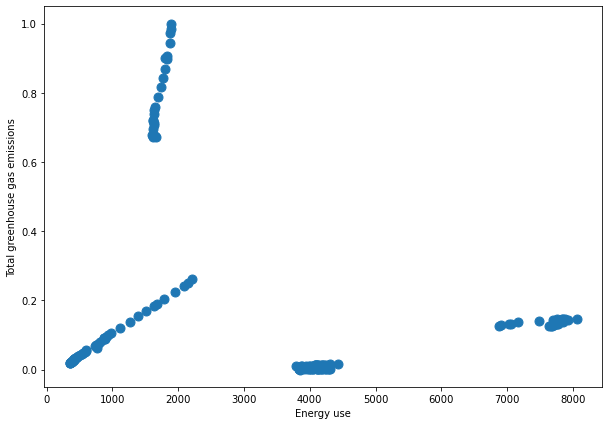

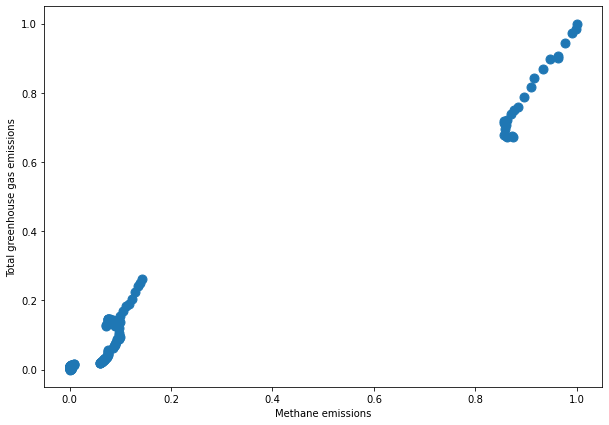

In [409]:
def makeplot(df, col1, col2):
    plt.figure(figsize=(10.0,7.0))
    plt.plot(df[col1], df[col2], "o", markersize=9)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.savefig(f'{col1}_dataplot.jpg')

    plt.show()
    
makeplot(normalised_df, "Energy use", "Total greenhouse gas emissions")
makeplot(normalised_df, "Methane emissions", "Total greenhouse gas emissions")

### K Mean Clustering

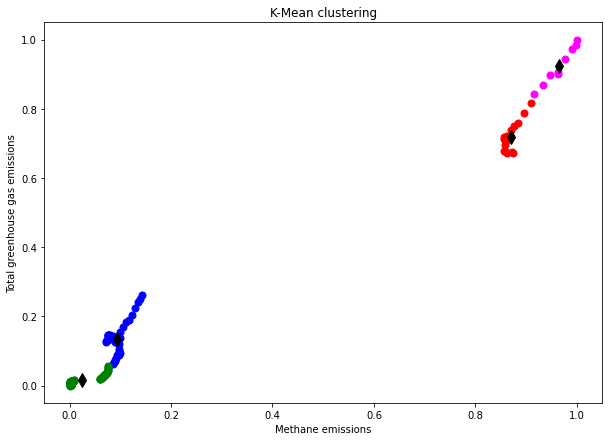

In [419]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = normalised_df[["Methane emissions", "Total greenhouse gas emissions"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(10.0,7.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["Methane emissions"][labels==l], df_fit["Total greenhouse gas emissions"][labels==l], "o",
             markersize=7, color=col[l])

# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)

plt.xlabel("Methane emissions")
plt.ylabel("Total greenhouse gas emissions")
plt.title('K-Mean clustering')
plt.savefig('K-Mean cluster.jpg')
plt.show()

### Agglomerative Clustering

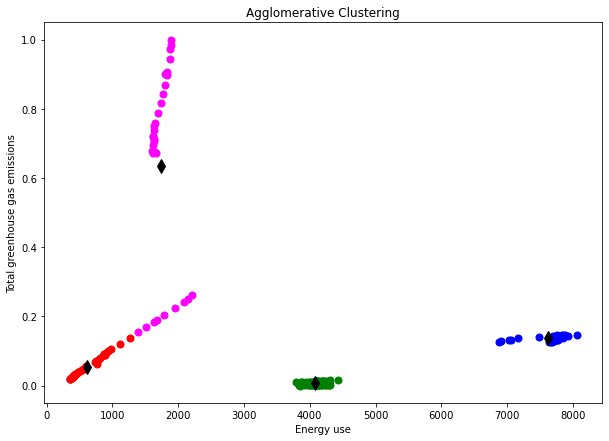

In [418]:
##### setting up agglomerative clustering for 4 clusters
ac = cluster.AgglomerativeClustering(n_clusters=4)

df_fit = normalised_df[["Energy use", "Total greenhouse gas emissions"]].copy()

# carry out the fitting
ac.fit(df_fit)

labels = ac.labels_

# The clusterer does not return cluster centres, but they are easily computed
xcen = []
ycen = []
for ic in range(4):
    xc = np.average(df_fit["Energy use"][labels==ic])
    yc = np.average(df_fit["Total greenhouse gas emissions"][labels==ic])
    xcen.append(xc)
    ycen.append(yc)

# plot using the labels to select colour
plt.figure(figsize=(10.0,7.0))

col = ["blue", "red", "green", "magenta"]
for l in range(0,4):     # loop over the different labels
    plt.plot(df_fit["Energy use"][labels==l], df_fit["Total greenhouse gas emissions"][labels==l], "o", 
             markersize=7, color=col[l])

# show cluster centres
for ic in range(4):
    plt.plot(xcen[ic], ycen[ic], "dk", markersize=10)

plt.xlabel("Energy use")
plt.ylabel("Total greenhouse gas emissions")
plt.title('Agglomerative Clustering')
plt.savefig('agglomerative cluster.jpg')
plt.show()

### Data Fitting

In [391]:
def exp_growth(t, scale, growth):
    f = scale * np.exp(growth * (t-1990)) 
    return f
        

def logistics(t, scale, growth, t0):
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    return f
# Define the exponential function and the logistics functions for fitting.


In [402]:
# taking one country from climate set
clim_dataset = get_world_bank_data(['CAN'])

climate_dataset = climate_dataset.reset_index(drop=True)
clim_dataset = clim_dataset.reset_index()

# fit exponential growth
popt, covar = opt.curve_fit(exp_growth, climate_dataset['Year'], climate_dataset['Total greenhouse gas emissions'])

id                 value
-----------------  -----------------------------------------------------
EG.USE.PCAP.KG.OE  Energy use (kg of oil equivalent per capita)
EN.ATM.METH.KT.CE  Methane emissions (kt of CO2 equivalent)
EN.ATM.GHGT.KT.CE  Total greenhouse gas emissions (kt of CO2 equivalent)
                   3 elements


'Checking null values in DataFrame'

Energy use                          0
Total greenhouse gas emissions      0
Methane emissions                   0
dtype: int64

Fit parameter [6.55324890e+06 2.23010336e-02]


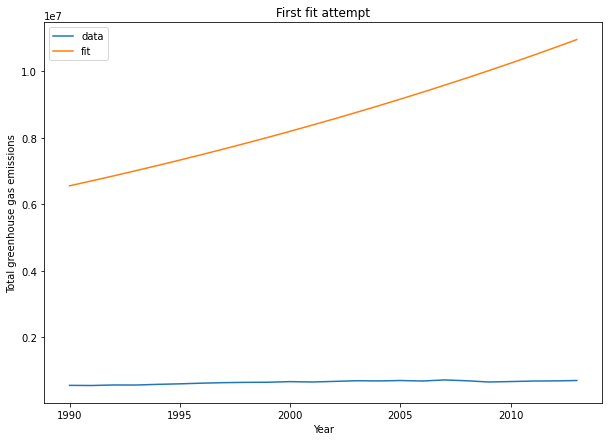

In [412]:
print("Fit parameter", popt)

# use *popt to pass on the fit parameters
clim_dataset["greenhouse_gas_exp"] = exp_growth(clim_dataset["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(clim_dataset["Year"], clim_dataset["Total greenhouse gas emissions"], label="data")
plt.plot(clim_dataset["Year"], clim_dataset["greenhouse_gas_exp"], label="fit")

plt.legend()
plt.title("First fit attempt")
plt.xlabel("Year")
plt.ylabel("Total greenhouse gas emissions")
plt.savefig('exp_first attempt.jpg')
plt.show()
print()

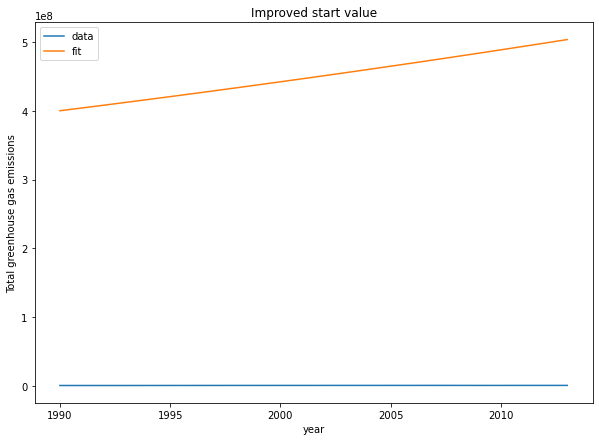

In [413]:
# find a feasible start value the pedestrian way
# the scale factor is way too small. The exponential factor too large. 
# Try scaling with the 1950 population and a smaller exponential factor
# decrease or increase exponential factor until rough agreement is reached
# growth of 0.02 gives a reasonable start value
popt = [4e8, 0.01]
clim_dataset["greenhouse_gas_exp"] = exp_growth(clim_dataset["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(clim_dataset["Year"], clim_dataset["Total greenhouse gas emissions"], label="data")
plt.plot(clim_dataset["Year"], clim_dataset["greenhouse_gas_exp"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("Total greenhouse gas emissions")
plt.title("Improved start value")
plt.savefig('exp_Improved start.jpg')
plt.show()


Fit parameter [5.83849745e+05 9.53777140e-03]


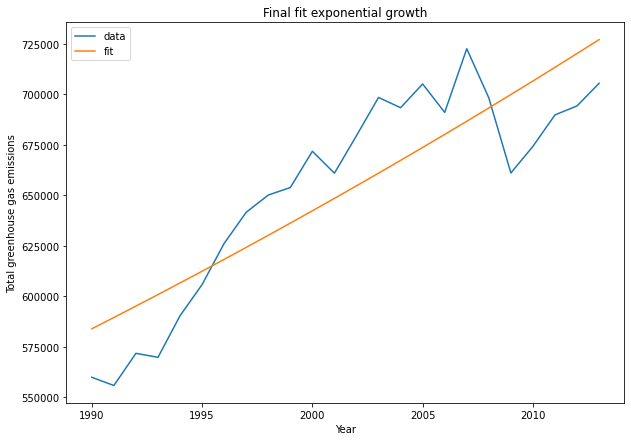

In [414]:
# fit exponential growth
popt, covar = opt.curve_fit(exp_growth, clim_dataset["Year"], 
                            clim_dataset["Total greenhouse gas emissions"], p0=[4e8, 0.02])
# much better
print("Fit parameter", popt)

clim_dataset["greenhouse_gas_exp"] = exp_growth(clim_dataset["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(clim_dataset["Year"], clim_dataset["Total greenhouse gas emissions"], label="data")
plt.plot(clim_dataset["Year"], clim_dataset["greenhouse_gas_exp"], label="fit")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Total greenhouse gas emissions")
plt.title("Final fit exponential growth")
plt.savefig('exp_final fit.jpg')
plt.show()
print()


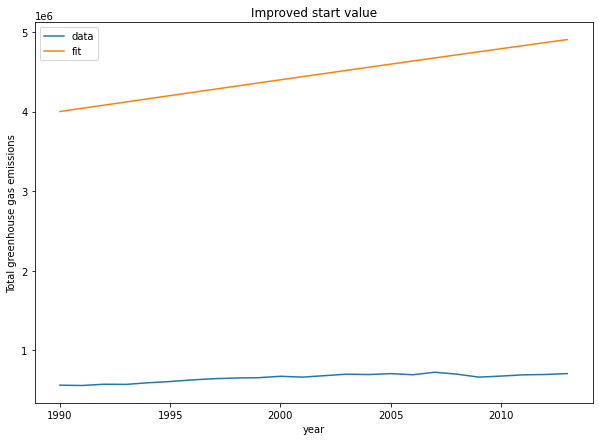

In [415]:
# estimated turning year: 1990
# kept growth value from before
# increase scale factor and growth rate until rough fit
popt = [8e6, 0.02, 1990]
clim_dataset["greenhouse_gas_log"] = logistics(clim_dataset["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.plot(clim_dataset["Year"], clim_dataset["Total greenhouse gas emissions"], label="data")
plt.plot(clim_dataset["Year"], clim_dataset["greenhouse_gas_log"], label="fit")

plt.legend()
plt.xlabel("year")
plt.ylabel("Total greenhouse gas emissions")
plt.title("Improved start value")
plt.savefig('log_improved start.jpg')
plt.show()

Fit parameter [7.07973432e+05 1.53338033e-01 1.98252595e+03]


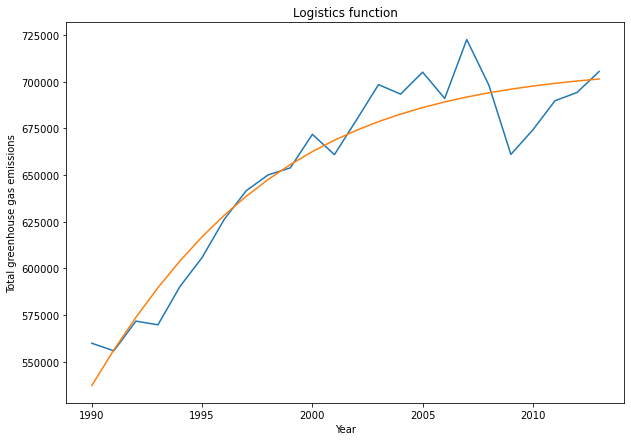

In [416]:
popt, covar = opt.curve_fit(logistics, clim_dataset["Year"], clim_dataset["Total greenhouse gas emissions"], 
                            p0=(2e9, 0.05, 1990.0), maxfev=1200)
print("Fit parameter", popt)

      
clim_dataset["greenhouse_gas_log"] = logistics(clim_dataset["Year"], *popt)

plt.figure(figsize=(10.0,7.0))
plt.title("Logistics function")
plt.plot(clim_dataset["Year"], clim_dataset["Total greenhouse gas emissions"], label="data")
plt.plot(clim_dataset["Year"], clim_dataset["greenhouse_gas_log"], label="fit")

plt.xlabel("Year")
plt.ylabel("Total greenhouse gas emissions")
plt.savefig('log_function.jpg')
plt.show()

In [374]:
import itertools as iter

def err_ranges(x, func, param, sigma):
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
    
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)

        
    return lower, upper

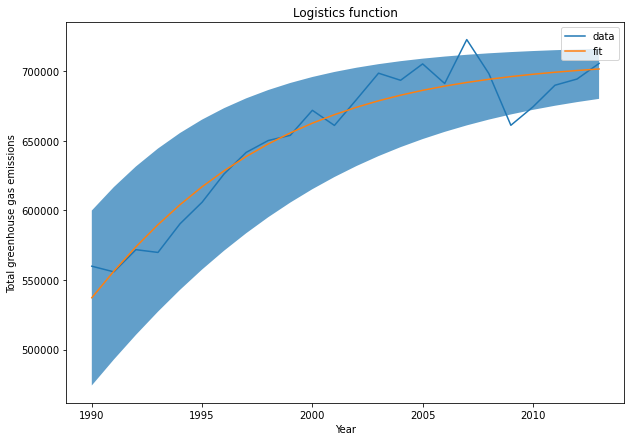

In [417]:
# extract the sigmas from the diagonal of the covariance matrix
sigma = np.sqrt(np.diag(covar))

low, up = err_ranges(clim_dataset["Year"], logistics, popt, sigma)

plt.figure(figsize=(10.0,7.0))
plt.title("Logistics function")
plt.plot(clim_dataset["Year"], clim_dataset["Total greenhouse gas emissions"], label="data")
plt.plot(clim_dataset["Year"], clim_dataset["greenhouse_gas_log"], label="fit")

plt.fill_between(clim_dataset["Year"], low, up, alpha=0.7)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Total greenhouse gas emissions")
plt.savefig('error range.jpg')
plt.show()


In [376]:
print("Forcasted greenhouse gas emissions")
low, up = err_ranges(2030, logistics, popt, sigma)
print("2030 between ", low, "and", up)
low, up = err_ranges(2040, logistics, popt, sigma)
print("2040 between ", low, "and", up)
low, up = err_ranges(2050, logistics, popt, sigma)
print("2050 between ", low, "and", up)

Forcasted greenhouse gas emissions
2030 between  695712.0123626295 and 717961.6445423712
2040 between  697263.5246579736 and 718045.8196386365
2050 between  697707.3447139635 and 718059.5650489567


In [377]:
print("Forcasted greenhouse gas emissions")
low, up = err_ranges(2030, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2030:", mean, "+/-", pm)

low, up = err_ranges(2040, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2040:", mean, "+/-", pm)

low, up = err_ranges(2050, logistics, popt, sigma)
mean = (up+low) / 2.0
pm = (up-low) / 2.0
print("2050:", mean, "+/-", pm)

Forcasted greenhouse gas emissions
2030: 706836.8284525003 +/- 11124.816089870816
2040: 707654.672148305 +/- 10391.147490331496
2050: 707883.45488146 +/- 10176.110167496605
